# A star algorithm

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

In [52]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __eq__(self, other):
        if self.position == other.position:
            return True

In [53]:
show_animation  = True

In [54]:
def heuristic(cur_node, goal_node):
    w = 1 # weigth of heuristic
    dist = np.sqrt((cur_node.position[0] - goal_node.position[0])**2 + (cur_node.position[1]  - goal_node.position[1])**2)
    return w*dist

In [55]:
def get_action():
    # dx, dy, cost
    action_set = [[0,-1,1], [0,1,1], [-1,0,1], [1,0,1],
                          [1,-1,np.sqrt(2)], [1,1,np.sqrt(2)], [-1,1,np.sqrt(2)], [-1,-1,np.sqrt(2)]]
    return action_set

In [78]:
# a star algorithm
def a_star(map_, start, goal):
    
    # initialize
    start_node = Node(None, start)
    goal_node = Node(None, goal)

    Open = []
    Closed = []

    Open.append(start_node)
    
    while Open is not None:
        # find current node with lowest f in 'Open list'
        cur_node = Open[0]
        cur_ind = 0
        for ind, node in enumerate(Open):
            if node.f < cur_node.f:
                cur_node = node
                cur_ind = ind
        
        # If goal, get optimal path
        if cur_node == goal_node:
            opt_path = []

            node = cur_node

            while node is not None:
                opt_path.append(node.position)
                node = node.parent
            print("opt path : ", opt_path[::-1])
            return opt_path[::-1]

        # if not goal, delete from 'Open list' and add to 'Closed list'
        Open.pop(cur_ind)
        Closed.append(cur_node)

        # search child nodes
        action_set = get_action()
        
        for action in action_set:
            # position of child candidate
            child_cand = (cur_node.position[0] + action[0], cur_node.position[1] + action[1])

            # check within map
            if child_cand[0] >= np.shape(map_)[0] and child_cand[0] <= 0 and child_cand[1] >= np.shape(map_)[1] and  child_cand[1] <= 0:
                continue

            # check obstacle
            if map_[child_cand[0]][child_cand[1]] == 1:
                continue

            # create new node
            child = Node(parent=cur_node, position=child_cand)

            child.g = cur_node.g + action[2]
            child.h = heuristic(child, goal_node)
            child.f = child.g + child.h

            # If in 'Closed list', continue 
            if child in Closed:
                continue

            # if node is not in 'Open list', add it
            if child not in Open:
                Open.append(child)

            if child in Open:
                for node in Open:
                    if node == child and node.f > child.f:
                        node.f = child.f


opt path :  [(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 4), (6, 3), (7, 4), (8, 5), (9, 6)]


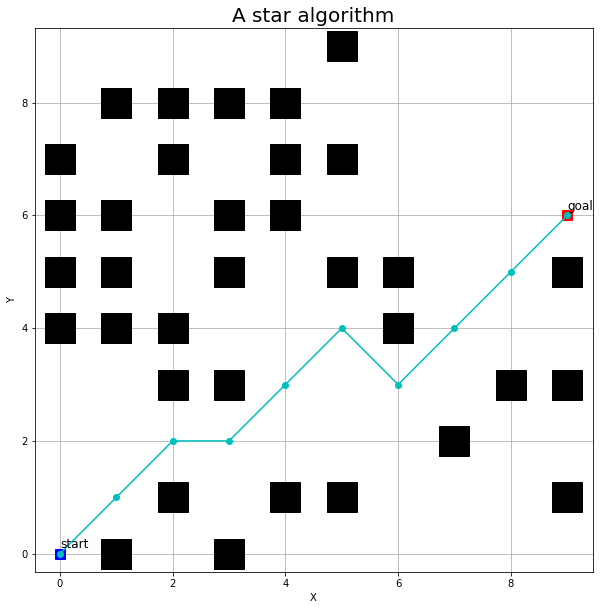

In [114]:
def main():
#     map_ = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    
    start = (0, 0)
    goal = (9, 6)
    
    len_mapx = 10
    len_mapy = 10
    
    map_ = np.zeros((len_mapx, len_mapy))
    for i in range(len_mapx):
        for j in range(len_mapy):
            if (i == start[0] and j == start[1]) or (i == goal[0] and j == goal[1]):
                pass
            else:
                _n = random.randint(1,10)
                if _n % 3 == 0:
                    map_[i,j] = 1
    map_ = list(map_)        

    opt_path = a_star(map_, start, goal)
    opt_path = np.array(np.array(opt_path))
    map_ = np.array(map_)
    
    if show_animation == True:
        plt.figure(figsize=(10,10))
        plt.plot(start[0], start[1], 'bs',  markersize=10)
        plt.text(start[0], start[1]+0.1, 'start', fontsize=12)
        plt.plot(goal[0], goal[1], 'rs',  markersize=10)
        plt.text(goal[0], goal[1]+0.1, 'goal', fontsize=12)
        
        for i in range(10):
            for j in range(10):
                if map_[i,j] == 1:
                    plt.plot(i,j, 'ks', markersize=30)
            
        plt.grid(True)
        plt.axis("equal")
        plt.plot(opt_path[:,0], opt_path[:,1], "co-")
        plt.xlabel("X"), plt.ylabel("Y")
        plt.title("A star algorithm", fontsize=20)
        plt.show()
    
    
if __name__ == "__main__":
    main()